In [1]:
#@title Mount drive content
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Work/TSM

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Work/TSM


In [2]:
import pathlib as pt
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
RUN_TIME = "2020_08_28-14_40"
EPOCH = "95"
PRED_PATH = pt. Path("/content/drive/My Drive/Work/TSM/trainings/")/RUN_TIME/"predictions"/EPOCH
PRED_CSV = PRED_PATH/"predictions_thresh_0.5.csv"

In [4]:
pred_df = pd.read_csv(PRED_CSV)
pred_df.head(2)

,Unnamed: 0,img_path,mask_true_path,mask_pred_path,dice_score,iou_score
0,0,/content/drive/My Drive/Work/TSM/dataset/image...,/content/drive/My Drive/Work/TSM/dataset/masks...,/content/drive/My Drive/Work/TSM/trainings/202...,0.0,0.0
1,1,/content/drive/My Drive/Work/TSM/dataset/image...,/content/drive/My Drive/Work/TSM/dataset/masks...,/content/drive/My Drive/Work/TSM/trainings/202...,0.0,0.0


In [5]:
_df = pred_df.loc[pred_df['dice_score'] > 0.4, :]
sample_df = _df.sample(n=5)
sample_df

,Unnamed: 0,img_path,mask_true_path,mask_pred_path,dice_score,iou_score
174,174,/content/drive/My Drive/Work/TSM/dataset/image...,/content/drive/My Drive/Work/TSM/dataset/masks...,/content/drive/My Drive/Work/TSM/trainings/202...,0.713602,0.554729
207,207,/content/drive/My Drive/Work/TSM/dataset/image...,/content/drive/My Drive/Work/TSM/dataset/masks...,/content/drive/My Drive/Work/TSM/trainings/202...,0.495964,0.329756
347,347,/content/drive/My Drive/Work/TSM/dataset/image...,/content/drive/My Drive/Work/TSM/dataset/masks...,/content/drive/My Drive/Work/TSM/trainings/202...,0.807647,0.677356
147,147,/content/drive/My Drive/Work/TSM/dataset/image...,/content/drive/My Drive/Work/TSM/dataset/masks...,/content/drive/My Drive/Work/TSM/trainings/202...,0.453668,0.293383
235,235,/content/drive/My Drive/Work/TSM/dataset/image...,/content/drive/My Drive/Work/TSM/dataset/masks...,/content/drive/My Drive/Work/TSM/trainings/202...,0.704068,0.543291


(1024, 1024) (1024, 1024)
0 255 0 255


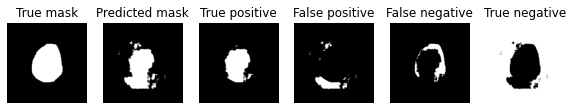

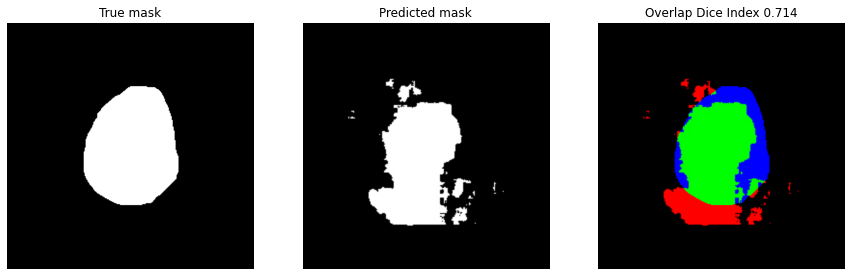

(1024, 1024) (1024, 1024)
0 255 0 255


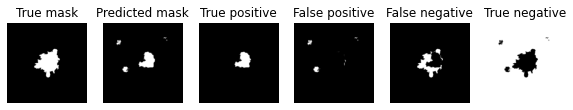

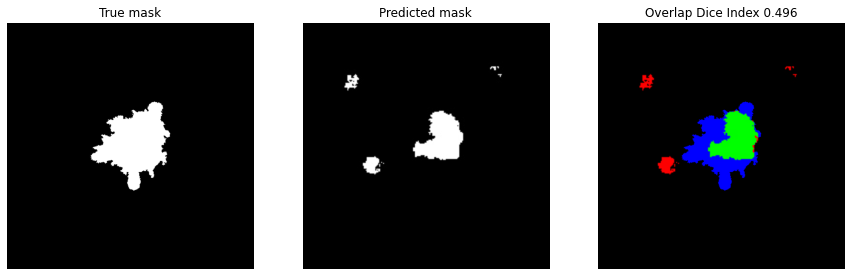

(1024, 1024) (1024, 1024)
0 255 0 255


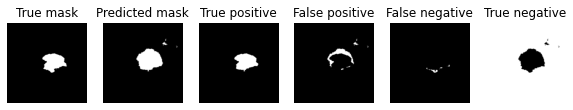

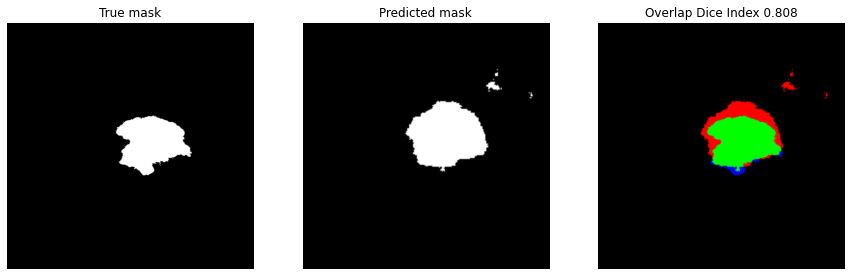

(1024, 1024) (1024, 1024)
0 255 0 255


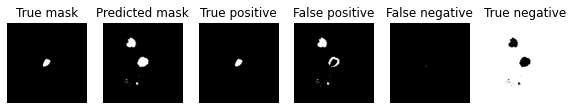

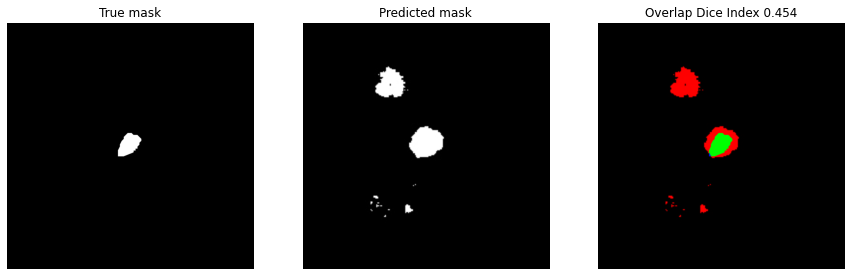

(1024, 1024) (1024, 1024)
0 255 0 255


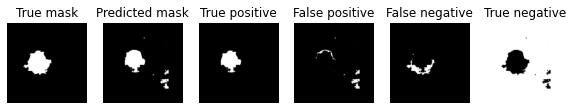

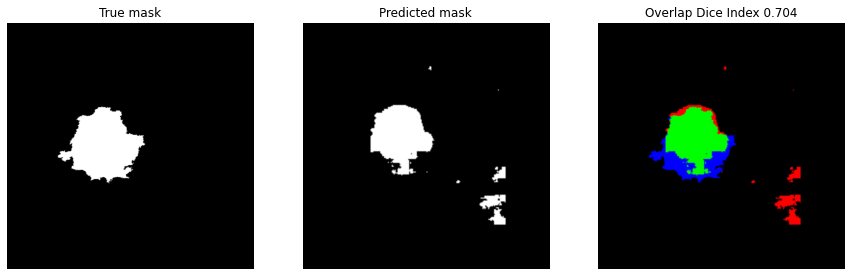

In [6]:
for _, row in sample_df.iterrows():
  true_mask = cv2.imread(row['mask_true_path'], cv2.IMREAD_GRAYSCALE)
  true_mask = cv2.resize(true_mask, dsize=(1024, 1024))

  pred_mask = cv2.imread(row['mask_pred_path'], cv2.IMREAD_UNCHANGED)
  pred_mask = cv2.resize(pred_mask, dsize=(1024, 1024))

  print(true_mask.shape, pred_mask.shape)
  print(true_mask.min(), true_mask.max(), pred_mask.min(), pred_mask.max())
  tp = true_mask & pred_mask
  fp = ~true_mask & pred_mask
  fn = true_mask & ~pred_mask
  tn = ~true_mask & ~pred_mask

  fig1, ax = plt.subplots(1, 6, figsize=(10, 7))
  ax[0].imshow(true_mask, cmap='gray')
  ax[0].axis('off')
  ax[0].set_title("True mask")
  
  ax[1].imshow(pred_mask, cmap='gray')
  ax[1].axis('off')
  ax[1].set_title("Predicted mask")

  ax[2].imshow(tp, cmap='gray')
  ax[2].axis('off')
  ax[2].set_title("True positive")
  
  ax[3].imshow(fp, cmap='gray')
  ax[3].axis('off')
  ax[3].set_title("False positive")

  ax[4].imshow(fn, cmap='gray')
  ax[4].axis('off')
  ax[4].set_title("False negative")

  ax[5].imshow(tn, cmap='gray')
  ax[5].axis('off')
  ax[5].set_title("True negative")

  plt.show()

  fig2, ax = plt.subplots(1, 3, figsize=(15, 7))

  overlap = np.zeros((1024, 1024, 3), dtype=np.uint8)
  overlap[:, :] = (255, 255, 255)
  overlap[:, :, 0] = fp
  overlap[:, :, 1] = tp
  overlap[:, :, 2] = fn

  ax[0].imshow(true_mask, cmap='gray')
  ax[0].axis('off')
  ax[0].set_title("True mask")
  
  ax[1].imshow(pred_mask, cmap='gray')
  ax[1].axis('off')
  ax[1].set_title("Predicted mask")

  ax[2].imshow(overlap)
  ax[2].axis('off')
  ax[2].set_title("Overlap Dice Index {:.3f}".format(float(row['dice_score'])))

  plt.show()


